In [1]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

<function matplotlib.pyplot.show(close=None, block=None)>

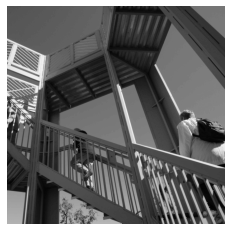

In [2]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show

In [3]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

#### Creating the filter 

There are a bunch of tried and tested filters that you'll use for whatever applications you want

Here, it's an exercise to just show you what filters are supposed to do and how they work

In [4]:
#filter = [[1,2,1],[-1,-2,-1],[0,0,0]]
filter = [[1,0,1],[0,1,0],[-1,-1,-1]]
weight = 1

In [5]:
for x in range(1, size_x-1):
    for y in range(1,size_y-1):
        output_pixel = 0
        output_pixel = output_pixel + (i[x-1,y-1] * filter[0][0])
        output_pixel = output_pixel + (i[x,y-1] * filter[0][1])
        output_pixel = output_pixel + (i[x+1,y-1] * filter[0][2])
        output_pixel = output_pixel + (i[x-1,y] * filter[1][0])
        output_pixel = output_pixel + (i[x,y] * filter[1][1])
        output_pixel = output_pixel + (i[x+1,y] * filter[1][2])
        output_pixel = output_pixel + (i[x-1,y+1] * filter[2][0])
        output_pixel = output_pixel + (i[x,y+1] * filter[2][1])
        output_pixel = output_pixel + (i[x+1,y+1] * filter[2][2])
        output_pixel = output_pixel * weight
        
        if(output_pixel<0):
            output_pixel = 0
        elif(output_pixel>255):
            output_pixel = 255
        
        i_transformed[x,y] = output_pixel

#### Plotting the transformed image

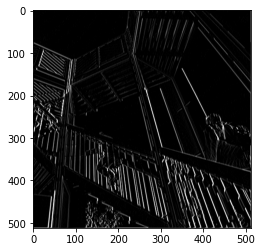

In [6]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

#### Pooling

Down below you're essentially hardcoding the maxpool2d function with a pool that's a 2x2 matrix

Pooling downscales the image while keeping the features that you recognised to make sure that task at hand can be completed efficiently by the NN without having to deal with irrelevant data

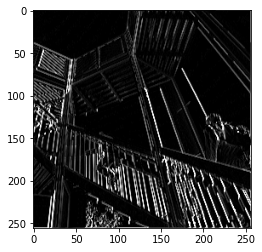

In [7]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x,new_y))
for x in range(0,size_x,2):
    for y in range(0,size_y,2):
        pixels = []
        pixels.append(i_transformed[x,y])
        pixels.append(i_transformed[x+1,y])
        pixels.append(i_transformed[x,y+1])
        pixels.append(i_transformed[x+1,y+1])
        pixels.sort(reverse = True)
        newImage[int(x/2), int(y/2)] = pixels[0]

plt.gray()
plt.grid(False)
plt.imshow(newImage)